In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [ ]:
anemia_df = pd.read_csv('/content/TB_DIGTEL_ANEMIA_ATENDIDOS.csv')
anemia_df

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432
...,...,...,...,...,...,...,...,...,...,...
405268,1314.0,37658561,14,A,F,20230206,12a-17a,D509,P,6177
405269,1283.0,21330668,30,A,F,20230228,30a-59a,D571,D,6198
405270,1283.0,21330668,30,A,F,20230224,30a-59a,D571,D,6204
405271,NaN,41282679,3,A,F,20230508,00a-11a,D509,P,6212


In [ ]:
anemia_df.dtypes.value_counts()

,count
object,5
int64,4
float64,1


In [ ]:
anemia_df.dropna(inplace=True)
anemia_df

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432
...,...,...,...,...,...,...,...,...,...,...
405267,1316.0,29639882,40,A,F,20230124,30a-59a,D509,P,6195
405268,1314.0,37658561,14,A,F,20230206,12a-17a,D509,P,6177
405269,1283.0,21330668,30,A,F,20230228,30a-59a,D571,D,6198
405270,1283.0,21330668,30,A,F,20230224,30a-59a,D571,D,6204


AGREGAR sexo_numerico

In [ ]:
anemia_df = (
    anemia_df.assign(
        sexo_num = lambda df: df.Sexo.replace(['F','M'],[0,1])
    )
)

anemia_df['anemia'] =  anemia_df['Diagnostico'].apply(lambda x:1 if x =='D509' else 0)

anemia_df

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,sexo_num,anemia
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021,0,1
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231,1,1
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231,1,1
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238,1,1
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
405267,1316.0,29639882,40,A,F,20230124,30a-59a,D509,P,6195,0,1
405268,1314.0,37658561,14,A,F,20230206,12a-17a,D509,P,6177,0,1
405269,1283.0,21330668,30,A,F,20230228,30a-59a,D571,D,6198,0,0
405270,1283.0,21330668,30,A,F,20230224,30a-59a,D571,D,6204,0,0


In [ ]:
anemia_procesado_df = anemia_df[['id_ubigeo','Edad','sexo_num','anemia']]
anemia_procesado_df

,id_ubigeo,Edad,sexo_num,anemia
0,1434.0,2,0,1
1,436.0,6,1,1
2,436.0,6,1,1
3,338.0,2,1,1
4,1274.0,1,0,1
...,...,...,...,...
405267,1316.0,40,0,1
405268,1314.0,14,0,1
405269,1283.0,30,0,0
405270,1283.0,30,0,0


In [ ]:
anemia_procesado_df.corr(numeric_only=True)

,id_ubigeo,Edad,sexo_num,anemia
id_ubigeo,1.000000,0.073330,-0.016626,-0.045460
Edad,0.073330,1.000000,-0.149766,-0.276340
sexo_num,-0.016626,-0.149766,1.000000,0.055988
anemia,-0.045460,-0.276340,0.055988,1.000000


<Axes: >

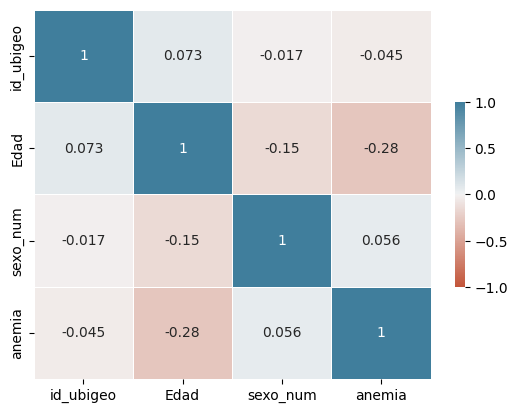

In [ ]:
sns.heatmap(
    data=anemia_procesado_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)